In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve


In [4]:
data = pd.read_csv("creditcard.csv",sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [6]:
def selectThresholdByCV(p_cv,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    #epsilons = np.asarray(epsilons)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

In [7]:
data.drop(['V19','V21','V1','V2','V6','V5','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V3      284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V7      284807 non-null  float64
 4   V9      284807 non-null  float64
 5   V10     284807 non-null  float64
 6   V11     284807 non-null  float64
 7   V12     284807 non-null  float64
 8   V14     284807 non-null  float64
 9   V16     284807 non-null  float64
 10  V17     284807 non-null  float64
 11  V18     284807 non-null  float64
 12  Amount  284807 non-null  float64
 13  Class   284807 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 30.4 MB


In [9]:
data.drop(labels = ["Amount","Time"], axis = 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V3      284807 non-null  float64
 1   V4      284807 non-null  float64
 2   V7      284807 non-null  float64
 3   V9      284807 non-null  float64
 4   V10     284807 non-null  float64
 5   V11     284807 non-null  float64
 6   V12     284807 non-null  float64
 7   V14     284807 non-null  float64
 8   V16     284807 non-null  float64
 9   V17     284807 non-null  float64
 10  V18     284807 non-null  float64
 11  Class   284807 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 26.1 MB


In [11]:
train_strip_v1 = data[data["Class"] == 1]
train_strip_v0 = data[data["Class"] == 0]

In [12]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)


print(train_fraud.columns.values)
print(train_cv.columns.values)
print(train_test.columns.values)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.829474
Best Recall Score 0.800813
Best Precision Score 0.860262
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.769811
Best Recall Score 0.829268
Best Precision Score 0.718310
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score , Recall and Precision are as below
Best F1 Score 0.489988
Best Recall Score 0.845528
Best Precision Score 0.344942
----------------------------------------


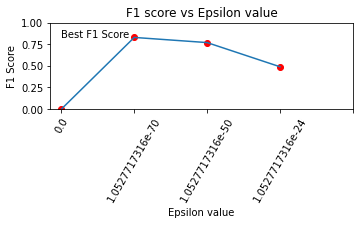

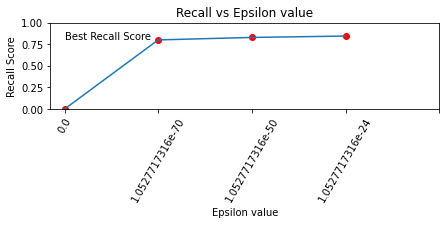

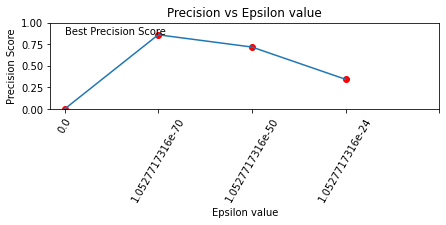

In [14]:
fscore, ep= selectThresholdByCV(p_cv,train_cv_y)

In [15]:
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.767816
Best Recall Score 0.681633
Best Precision Score 0.878947


In [16]:
print(predictions)

[False False False ... False  True False]


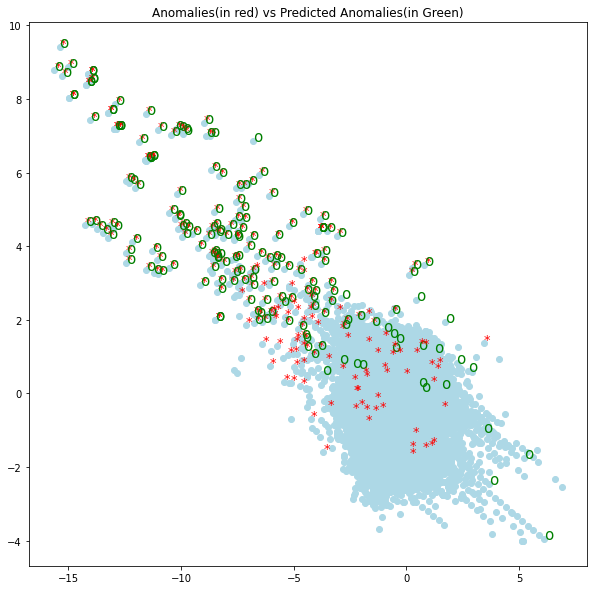

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')

In [18]:
predictions = (p_cv < ep)
Recall = recall_score(train_cv_y, predictions, average = "binary")    
Precision = precision_score(train_cv_y, predictions, average = "binary")
F1score = f1_score(train_cv_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Cross Validation dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)


F1 score , Recall and Precision for Cross Validation dataset
Best F1 Score 0.829474
Best Recall Score 0.800813
Best Precision Score 0.860262


In [19]:
mu_list = list(mu)
print(mu_list)

[0.5104878976927436, 0.10726751237075804, -0.06597896894433525, 0.02486667500272543, -0.015892024287892277, 0.1839426400556174, -0.08242157559256776, 0.09760795968403549, 0.0027448909460531974, 0.05924062888782901, -0.044862776009553566]


In [30]:
sigma_list = []
for sigma_row in sigma:
  list1 = []
  for sigma_row_element in sigma_row:
    list1.append(sigma_row_element)
  sigma_list.append(list1)

In [31]:
print(sigma_list)

[[1.6315738595225007, 0.02969780578179036, 0.021125582785734003, -0.038732782253550584, -0.06320081454552562, -0.003341050761664314, 0.010500847663729124, -0.1394434810871321, -0.1439256060849544, -0.10751277622375148, -0.09204016605238273], [0.02969780578179036, 1.8194451167891945, 0.04289876830413793, 0.04169494936059093, 0.004416334834498522, -0.04906035712769383, 0.08011453349925772, 0.07671042037386683, -0.010551868628870082, 0.11439587400101368, 0.010351799146148038], [0.021125582785734003, 0.04289876830413793, 1.2321844295883917, -0.004619618699988002, -0.05318813789415452, 0.06513034693933856, -0.0857846429339284, -0.08472615233556996, -0.045377677780911535, -0.13468234383277583, -0.029481190926730756], [-0.038732782253550584, 0.04169494936059093, -0.004619618699988002, 1.297192977256955, -0.06989936822782654, 0.04053402086336947, -0.2158161052895833, 0.050017140126056306, -0.0824062645891581, 0.00828991143014992, -0.011272182777290562], [-0.06320081454552562, 0.004416334834498

In [21]:
epsilon = ep
print(epsilon)

1.0527717316e-70


In [33]:
sample_data = data.sample(1).to_numpy()

In [34]:
sample_data

array([[-4.32534151, -1.7372055 , -2.9806504 ,  2.10426904,  1.84638841,
        -0.92496754,  1.03674368,  0.29918511,  1.82337038,  0.97785932,
         1.45471159,  0.        ]])

In [35]:
sample_list=[]
for sample_row in sample_data:
  sample_list_inner = []
  for sample_row_element in sample_row:
    sample_list_inner.append(sample_row_element)
  sample_list.append(sample_list_inner)

In [36]:
sample_list

[[-4.32534151249494,
  -1.7372054992609,
  -2.98065040276283,
  2.10426904264972,
  1.84638841257164,
  -0.924967539453603,
  1.03674367779061,
  0.299185110890814,
  1.82337037774654,
  0.977859323115455,
  1.45471158817804,
  0.0]]